In [24]:
import sagemaker
from sagemaker.tensorflow import TensorFlow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def get_train_data(location):
    print(location)
#         X = np.load(os.path.join(location, 'training.npz'))['xtrain']
#         y=np.load(os.path.join(location, 'training.npz'))['ytrain']
    df=pd.read_csv( 'salary.csv')
    X,y=df.iloc[:,0],df.iloc[:,1]
    X=np.array(X).astype('float32').reshape(-1,1)
    y=np.array(y/100000).astype('float32').reshape(-1,1)
    return X,y

In [3]:
sess=sagemaker.Session()

In [4]:
import boto3

In [5]:
sagemaker.__version__

'2.15.4'

In [6]:
role='arn:aws:iam::032934527328:role/service-role/AmazonSageMaker-ExecutionRole-20201014T214516'

In [7]:
hyperparameters={'epochs':300}

In [8]:
estimator=TensorFlow(
    entry_point= "custom_train.py",             # Your entry script
    role=role,
    framework_version="2.0.0",               # TensorFlow's version
    py_version='py3',
    train_instance_count=1,                   # "The number of GPUs instances to use"
#     train_instance_type='ml.c5.2xlarge',
    train_instance_type='local',
    hyperparameters=hyperparameters,
)

train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [9]:
prefix = 'salaryestimator'

In [10]:
training_input_path   = sess.upload_data('salary.csv', key_prefix=prefix+'/training_csv')
# training_input_path='file://salary.csv'
estimator.fit({'train':training_input_path})

Creating tmpxmx76xba_algo-1-e90cs_1 ... 
Attaching to tmpxmx76xba_algo-1-e90cs_12mdone
algo-1-e90cs_1  | 2020-10-27 21:01:16,866 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
algo-1-e90cs_1  | 2020-10-27 21:01:16,882 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-e90cs_1  | 2020-10-27 21:01:17,400 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-e90cs_1  | 2020-10-27 21:01:17,446 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-e90cs_1  | 2020-10-27 21:01:17,498 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-e90cs_1  | 2020-10-27 21:01:17,512 sagemaker-containers INFO     Invoking user script
algo-1-e90cs_1  | 
algo-1-e90cs_1  | Training Env:
algo-1-e90cs_1  | 
algo-1-e90cs_1  | {
algo-1-e90cs_1  |     "additional_framework_parameters": {},
algo-1-e90cs_1  |     "channel_input_dirs": {
algo-1-e90cs_1  

35/35 [==============================] - 1s 15ms/sample - loss: 7.0307
algo-1-e90cs_1  | Epoch 2/300
35/35 [==============================] - 0s 142us/sample - loss: 6.8925
algo-1-e90cs_1  | Epoch 3/300
35/35 [==============================] - 0s 123us/sample - loss: 6.7580
algo-1-e90cs_1  | Epoch 4/300
35/35 [==============================] - 0s 160us/sample - loss: 6.6166
algo-1-e90cs_1  | Epoch 5/300
35/35 [==============================] - 0s 155us/sample - loss: 6.4747
algo-1-e90cs_1  | Epoch 6/300
35/35 [==============================] - 0s 132us/sample - loss: 6.3288
algo-1-e90cs_1  | Epoch 7/300
35/35 [==============================] - 0s 131us/sample - loss: 6.1853
algo-1-e90cs_1  | Epoch 8/300
35/35 [==============================] - 0s 122us/sample - loss: 6.0392
algo-1-e90cs_1  | Epoch 9/300
35/35 [==============================] - 0s 115us/sample - loss: 5.8898
algo-1-e90cs_1  | Epoch 10/300
35/35 [==============================] - 0s 113us/sample - loss: 5.7460
algo-1-e90

35/35 [==============================] - 0s 119us/sample - loss: 1.1402
algo-1-e90cs_1  | Epoch 45/300
35/35 [==============================] - 0s 123us/sample - loss: 1.0443
algo-1-e90cs_1  | Epoch 46/300
35/35 [==============================] - 0s 131us/sample - loss: 0.9582
algo-1-e90cs_1  | Epoch 47/300
35/35 [==============================] - 0s 140us/sample - loss: 0.8811
algo-1-e90cs_1  | Epoch 48/300
35/35 [==============================] - 0s 132us/sample - loss: 0.8141
algo-1-e90cs_1  | Epoch 49/300
35/35 [==============================] - 0s 133us/sample - loss: 0.7500
algo-1-e90cs_1  | Epoch 50/300
35/35 [==============================] - 0s 126us/sample - loss: 0.6952
algo-1-e90cs_1  | Epoch 51/300
35/35 [==============================] - 0s 131us/sample - loss: 0.6495
algo-1-e90cs_1  | Epoch 52/300
35/35 [==============================] - 0s 124us/sample - loss: 0.6141
algo-1-e90cs_1  | Epoch 53/300
35/35 [==============================] - 0s 137us/sample - loss: 0.5850
a

35/35 [==============================] - 0s 162us/sample - loss: 0.4216
algo-1-e90cs_1  | Epoch 84/300
35/35 [==============================] - 0s 164us/sample - loss: 0.4175
algo-1-e90cs_1  | Epoch 85/300
35/35 [==============================] - 0s 150us/sample - loss: 0.4161
algo-1-e90cs_1  | Epoch 86/300
35/35 [==============================] - 0s 151us/sample - loss: 0.4129
algo-1-e90cs_1  | Epoch 87/300
35/35 [==============================] - 0s 155us/sample - loss: 0.4084
algo-1-e90cs_1  | Epoch 88/300
35/35 [==============================] - 0s 163us/sample - loss: 0.4043
algo-1-e90cs_1  | Epoch 89/300
35/35 [==============================] - 0s 141us/sample - loss: 0.4009
algo-1-e90cs_1  | Epoch 90/300
35/35 [==============================] - 0s 149us/sample - loss: 0.3971
algo-1-e90cs_1  | Epoch 91/300
35/35 [==============================] - 0s 152us/sample - loss: 0.3924
algo-1-e90cs_1  | Epoch 92/300
35/35 [==============================] - 0s 149us/sample - loss: 0.3874
a

35/35 [==============================] - 0s 138us/sample - loss: 0.2524
algo-1-e90cs_1  | Epoch 123/300
35/35 [==============================] - 0s 141us/sample - loss: 0.2502
algo-1-e90cs_1  | Epoch 124/300
35/35 [==============================] - 0s 120us/sample - loss: 0.2428
algo-1-e90cs_1  | Epoch 125/300
35/35 [==============================] - 0s 117us/sample - loss: 0.2347
algo-1-e90cs_1  | Epoch 126/300
35/35 [==============================] - 0s 126us/sample - loss: 0.2274
algo-1-e90cs_1  | Epoch 127/300
35/35 [==============================] - 0s 121us/sample - loss: 0.2209
algo-1-e90cs_1  | Epoch 128/300
35/35 [==============================] - 0s 125us/sample - loss: 0.2188
algo-1-e90cs_1  | Epoch 129/300
35/35 [==============================] - 0s 127us/sample - loss: 0.2124
algo-1-e90cs_1  | Epoch 130/300
35/35 [==============================] - 0s 136us/sample - loss: 0.2077
algo-1-e90cs_1  | Epoch 131/300
35/35 [==============================] - 0s 165us/sample - loss:

35/35 [==============================] - 0s 136us/sample - loss: 0.0982
algo-1-e90cs_1  | Epoch 157/300
35/35 [==============================] - 0s 188us/sample - loss: 0.0963
algo-1-e90cs_1  | Epoch 158/300
35/35 [==============================] - 0s 192us/sample - loss: 0.0853
algo-1-e90cs_1  | Epoch 159/300
35/35 [==============================] - 0s 175us/sample - loss: 0.0740
algo-1-e90cs_1  | Epoch 160/300
35/35 [==============================] - 0s 197us/sample - loss: 0.0731
algo-1-e90cs_1  | Epoch 161/300
35/35 [==============================] - 0s 158us/sample - loss: 0.0695
algo-1-e90cs_1  | Epoch 162/300
35/35 [==============================] - 0s 180us/sample - loss: 0.0656
algo-1-e90cs_1  | Epoch 163/300
35/35 [==============================] - 0s 184us/sample - loss: 0.0628
algo-1-e90cs_1  | Epoch 164/300
35/35 [==============================] - 0s 154us/sample - loss: 0.0648
algo-1-e90cs_1  | Epoch 165/300
35/35 [==============================] - 0s 155us/sample - loss:

35/35 [==============================] - 0s 155us/sample - loss: 0.0496
algo-1-e90cs_1  | Epoch 191/300
35/35 [==============================] - 0s 175us/sample - loss: 0.0555
algo-1-e90cs_1  | Epoch 192/300
35/35 [==============================] - 0s 158us/sample - loss: 0.0560
algo-1-e90cs_1  | Epoch 193/300
35/35 [==============================] - 0s 177us/sample - loss: 0.0513
algo-1-e90cs_1  | Epoch 194/300
35/35 [==============================] - 0s 172us/sample - loss: 0.0506
algo-1-e90cs_1  | Epoch 195/300
35/35 [==============================] - 0s 143us/sample - loss: 0.0544
algo-1-e90cs_1  | Epoch 196/300
35/35 [==============================] - 0s 171us/sample - loss: 0.0531
algo-1-e90cs_1  | Epoch 197/300
35/35 [==============================] - 0s 166us/sample - loss: 0.0498
algo-1-e90cs_1  | Epoch 198/300
35/35 [==============================] - 0s 148us/sample - loss: 0.0560
algo-1-e90cs_1  | Epoch 199/300
35/35 [==============================] - 0s 154us/sample - loss:

35/35 [==============================] - 0s 125us/sample - loss: 0.0550
algo-1-e90cs_1  | Epoch 232/300
35/35 [==============================] - 0s 141us/sample - loss: 0.0572
algo-1-e90cs_1  | Epoch 233/300
35/35 [==============================] - 0s 134us/sample - loss: 0.0546
algo-1-e90cs_1  | Epoch 234/300
35/35 [==============================] - 0s 132us/sample - loss: 0.0500
algo-1-e90cs_1  | Epoch 235/300
35/35 [==============================] - 0s 126us/sample - loss: 0.0619
algo-1-e90cs_1  | Epoch 236/300
35/35 [==============================] - 0s 142us/sample - loss: 0.0629
algo-1-e90cs_1  | Epoch 237/300
35/35 [==============================] - 0s 129us/sample - loss: 0.0554
algo-1-e90cs_1  | Epoch 238/300
35/35 [==============================] - 0s 136us/sample - loss: 0.0532
algo-1-e90cs_1  | Epoch 239/300
35/35 [==============================] - 0s 133us/sample - loss: 0.0514
algo-1-e90cs_1  | Epoch 240/300
35/35 [==============================] - 0s 127us/sample - loss:

35/35 [==============================] - 0s 114us/sample - loss: 0.0618
algo-1-e90cs_1  | Epoch 276/300
35/35 [==============================] - 0s 144us/sample - loss: 0.0516
algo-1-e90cs_1  | Epoch 277/300
35/35 [==============================] - 0s 138us/sample - loss: 0.0529
algo-1-e90cs_1  | Epoch 278/300
35/35 [==============================] - 0s 176us/sample - loss: 0.0619
algo-1-e90cs_1  | Epoch 279/300
35/35 [==============================] - 0s 125us/sample - loss: 0.0635
algo-1-e90cs_1  | Epoch 280/300
35/35 [==============================] - 0s 135us/sample - loss: 0.0560
algo-1-e90cs_1  | Epoch 281/300
35/35 [==============================] - 0s 146us/sample - loss: 0.0499
algo-1-e90cs_1  | Epoch 282/300
35/35 [==============================] - 0s 138us/sample - loss: 0.0532
algo-1-e90cs_1  | Epoch 283/300
35/35 [==============================] - 0s 136us/sample - loss: 0.0615
algo-1-e90cs_1  | Epoch 284/300
35/35 [==============================] - 0s 123us/sample - loss:

In [11]:
predictor=estimator.deploy(initial_instance_count=1,instance_type='local')

update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


!

In [19]:
yhat=predictor.predict(get_train_data('salary.csv')[0])
yhat=np.array(yhat['predictions'])

salary.csv


salary.csv
salary.csv


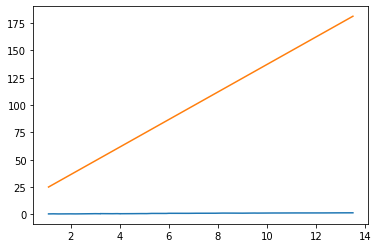

In [20]:
plt.plot(*get_train_data('salary.csv'))
plt.plot(get_train_data('salary.csv')[0],yhat)

Able to verify weights are correct, not sure why predictions are off from the deployed sagemkaer model
predictions work when using local keras model below

In [25]:
# download model from s3 and unzip
downloadedmodel=tf.keras.models.load_model(
    '/Users/ashingote/Downloads/000000001', custom_objects=None, compile=True
)

In [27]:
yhat=downloadedmodel.predict(get_train_data('salary.csv')[0])

salary.csv


salary.csv
salary.csv


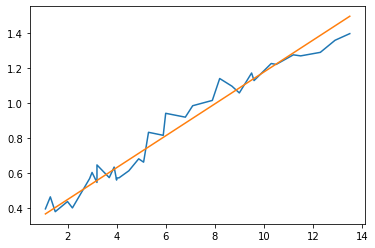

In [28]:
plt.plot(*get_train_data('salary.csv'))
plt.plot(get_train_data('salary.csv')[0],yhat)